In [2]:
import numpy as np

In [4]:

rightlist =np.array( [10,9,8,7,5])
leftlist=np.array([1,2,3,4,5])

In [6]:
a=rightlist-leftlist

In [15]:
a

array([9, 7, 5, 3, 0])

In [14]:
a-np.append(a[1:],0)

array([2, 2, 2, 3, 0])

In [ ]:
1,1*n,1*n

In [ ]:
result=[]

In [26]:
4-rightlist

array([-3, -4, -5, -6])

In [24]:
3-rightlist

array([ 2, -1, -6])

In [27]:
rightlist =np.array( [1,4,9])
leftlist=np.array([1,3,6])

In [26]:
# Python Version
def build(s, t, p):
    # 对 [s,t] 区间建立线段树,当前根的编号为 p
    if s == t:
        d[p] = a[s]
        return
    m = s + ((t - s) >> 1)
    # 移位运算符的优先级小于加减法，所以加上括号
    # 如果写成 (s + t) >> 1 可能会超出 int 范围
    build(s, m, p * 2); build(m + 1, t, p * 2 + 1)
    # 递归对左右区间建树
    d[p] = d[p * 2] + d[(p * 2) + 1]

In [41]:
# 线段树的节点类
class TreeNode(object):
    def __init__(self):
        self.left = -1
        self.right = -1
        self.sum_num = 0

    # 打印函数
    def __str__(self):
        return '[%s,%s,%s]' % (self.left, self.right, self.sum_num)

    # 打印函数
    def __repr__(self):
        return '[%s,%s,%s]' % (self.left, self.right, self.sum_num)


# 线段树类
# 以_开头的是递归实现
class Tree(object):
    def __init__(self, n, arr):
        self.n = n
        self.max_size = 4 * n
        self.tree = [TreeNode() for i in range(self.max_size)]  # 维护一个TreeNode数组
        self.arr = arr

    # index从1开始
    def _build(self, index, left, right):
        self.tree[index].left = left
        self.tree[index].right = right
        if left == right:
            self.tree[index].sum_num = self.arr[left - 1]
        else:
            mid = (left + right) // 2
            self._build(index * 2, left, mid)
            self._build(index * 2 + 1, mid + 1, right)
            self.pushup_sum(index)

    # 构建线段树
    def build(self):
        self._build(1, 1, self.n)

    def _update(self, point, val, i, l, r, ):
        if self.tree[i].left == self.tree[i].right:
            self.tree[i].sum_num += val
        else:
            mid = (l + r) // 2
            if point <= mid:
                self._update(point, val, i * 2, l, mid)
            else:
                self._update(point, val, i * 2 + 1, mid + 1, r)
                # 根据左右子树更新当前的值
            self.pushup_sum(i)

    # 单点更新
    # point 要更新的数在数组的下标 val更新的值
    def update(self, point, val, ):
        self._update(point, val, 1, 1, self.n)

    # 求和
    def pushup_sum(self, k):
        self.tree[k].sum_num = self.tree[k * 2].sum_num + self.tree[k * 2 + 1].sum_num

    def _query(self, ql, qr, i, l, r, ):
        if l >= ql and r <= qr:  # 若当前范围包含于要查询的范围
            return self.tree[i].sum_num
        else:
            mid = (l + r) // 2
            res_l = 0
            res_r = 0
            if ql <= mid:  # 左子树最大的值大于了查询范围最小的值-->左子树和需要查询的区间交集非空
                res_l = self._query(ql, qr, i * 2, l, mid, )
            if qr > mid:  # 右子树最小的值小于了查询范围最大的值-->右子树和需要查询的区间交集非空
                res_r = self._query(ql, qr, i * 2 + 1, mid + 1, r, )
            return res_l + res_r

    # 区间查询
    def query(self, ql, qr):
        return self._query(ql, qr, 1, 1, self.n)

    # 深度遍历打印数组
    def _show_arr(self, i):
        if self.tree[i].left == self.tree[i].right and self.tree[i].left != -1:
            print(self.tree[i].sum_num, end=" ")
        if 2 * i < len(self.tree):
            self._show_arr(i * 2)
            self._show_arr(i * 2 + 1)

    # 显示更新后的数组的样子
    def show_arr(self, ):
        self._show_arr(1)

# 落谷测试用例1
def test():
    n = 5  # 1 5 4 2 3
    arr = [1, 1, 1, 1, 1]
    tree = Tree(n, arr)
    tree.build()
    tree.update(1, 3)
#     res = tree.query(2, 5)
#     print(res)
#     tree.update(3, -1)
#     tree.update(4, 2)
    res = tree.query(1, 4)
    print(tree.show_arr())
    print(res)





1 1 1 1
1
1111


In [32]:
    tree = Tree(n, arr)
    tree.build()

In [42]:
test()

4 1 1 1 1 None
7


In [112]:

def build(arr,tree,node,start,end):
    if start==end:
        
        tree[node]=arr[start]
        
    else:
        mid = int((start+end) /2)
        
        left_node = 2*node+1
        right_node = 2*node+2
        build(arr,tree,left_node,start,mid)
        build(arr,tree,right_node,mid+1,end)
        
        tree[node]=tree[left_node]+tree[right_node]
        print(tree)
    

In [290]:
d={}

# Python Version
def build(s, t, p):
    # 对 [s,t] 区间建立线段树,当前根的编号为 p
    if s == t:
        d[p] = a[s]
        return
    m = s + ((t - s) >> 1)
    # 移位运算符的优先级小于加减法，所以加上括号
    # 如果写成 (s + t) >> 1 可能会超出 int 范围
    build(s, m, p * 2); build(m + 1, t, p * 2 + 1)
    # 递归对左右区间建树
    d[p] = d[p * 2] + d[(p * 2) + 1]


In [145]:
# Python Version
def update(l, r, c, s, t, p):
    # [l, r] 为修改区间, c 为被修改的元素的变化量, [s, t] 为当前节点包含的区间, p
    # 为当前节点的编号
    if l <= s and t <= r:
        d[p] = d[p] + (t - s + 1) * c
        
        b[p] = b[p] + c
        return
    # 当前区间为修改区间的子集时直接修改当前节点的值, 然后打标记, 结束修改
    m = s + ((t - s) >> 1)
    if b[p] and s != t:
        # 如果当前节点的懒标记非空, 则更新当前节点两个子节点的值和懒标记值
        d[p * 2] = d[p * 2] + b[p] * (m - s + 1)
        d[p * 2 + 1] = d[p * 2 + 1] + b[p] * (t - m)
        # 将标记下传给子节点
        b[p * 2] = b[p * 2] + b[p]
        b[p * 2 + 1] = b[p * 2 + 1] + b[p]
        # 清空当前节点的标记
        b[p] = 0
    if l <= m:
        update(l, r, c, s, m, p * 2)
    if r > m:
        update(l, r, c, m + 1, t, p * 2 + 1)
    d[p] = d[p * 2] + d[p * 2 + 1]
    print(d)

In [261]:
a=[1 for i in range(1,10+1)]
print(a)
build(0, 9, 1)
d

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{4: 7, 5: 6, 2: 13, 3: 15, 1: 28, 0: 35, 8: 2, 9: 3, 6: 114, 7: 76, 16: 1, 17: 1, 10: 39, 11: 39, 24: 77, 25: 77, 12: 78, 13: 39, 14: 1, 15: 1}
{4: 3, 5: 6, 2: 13, 3: 15, 1: 28, 0: 35, 8: 2, 9: 1, 6: 114, 7: 76, 16: 1, 17: 1, 10: 39, 11: 39, 24: 77, 25: 77, 12: 78, 13: 39, 14: 1, 15: 1}
{4: 3, 5: 2, 2: 13, 3: 15, 1: 28, 0: 35, 8: 2, 9: 1, 6: 114, 7: 76, 16: 1, 17: 1, 10: 1, 11: 1, 24: 77, 25: 77, 12: 78, 13: 39, 14: 1, 15: 1}
{4: 3, 5: 2, 2: 5, 3: 15, 1: 28, 0: 35, 8: 2, 9: 1, 6: 114, 7: 76, 16: 1, 17: 1, 10: 1, 11: 1, 24: 77, 25: 77, 12: 78, 13: 39, 14: 1, 15: 1}
{4: 3, 5: 2, 2: 5, 3: 15, 1: 28, 0: 35, 8: 2, 9: 1, 6: 114, 7: 76, 16: 1, 17: 1, 10: 1, 11: 1, 24: 1, 25: 1, 12: 2, 13: 39, 14: 1, 15: 1}
{4: 3, 5: 2, 2: 5, 3: 15, 1: 28, 0: 35, 8: 2, 9: 1, 6: 3, 7: 76, 16: 1, 17: 1, 10: 1, 11: 1, 24: 1, 25: 1, 12: 2, 13: 1, 14: 1, 15: 1}
{4: 3, 5: 2, 2: 5, 3: 15, 1: 28, 0: 35, 8: 2, 9: 1, 6: 3, 7: 2, 16: 1, 17: 1, 10: 1, 11: 1, 24: 1, 25: 1, 12: 2, 13: 1, 14: 1

{4: 3,
 5: 2,
 2: 5,
 3: 5,
 1: 10,
 0: 35,
 8: 2,
 9: 1,
 6: 3,
 7: 2,
 16: 1,
 17: 1,
 10: 1,
 11: 1,
 24: 1,
 25: 1,
 12: 2,
 13: 1,
 14: 1,
 15: 1}

In [262]:
b=[0 for i in d]


In [253]:
update(1, 9, 2, 0, 9, 1)
d

{4: 3, 5: 2, 2: 5, 3: 5, 1: 10, 0: 35, 8: 4, 9: 1, 6: 3, 7: 2, 16: 1, 17: 3, 10: 1, 11: 1, 24: 1, 25: 1, 12: 2, 13: 1, 14: 1, 15: 1}
{4: 7, 5: 2, 2: 5, 3: 5, 1: 10, 0: 35, 8: 4, 9: 3, 6: 3, 7: 2, 16: 1, 17: 3, 10: 1, 11: 1, 24: 1, 25: 1, 12: 2, 13: 1, 14: 1, 15: 1}
{4: 7, 5: 6, 2: 13, 3: 5, 1: 10, 0: 35, 8: 4, 9: 3, 6: 3, 7: 2, 16: 1, 17: 3, 10: 1, 11: 1, 24: 1, 25: 1, 12: 2, 13: 1, 14: 1, 15: 1}
{4: 7, 5: 6, 2: 13, 3: 15, 1: 28, 0: 35, 8: 4, 9: 3, 6: 3, 7: 2, 16: 1, 17: 3, 10: 1, 11: 1, 24: 1, 25: 1, 12: 2, 13: 1, 14: 1, 15: 1}


{4: 7,
 5: 6,
 2: 13,
 3: 15,
 1: 28,
 0: 35,
 8: 4,
 9: 3,
 6: 3,
 7: 2,
 16: 1,
 17: 3,
 10: 1,
 11: 1,
 24: 1,
 25: 1,
 12: 2,
 13: 1,
 14: 1,
 15: 1}

In [303]:
# Python Version
def update(l, r, c, s, t, p):
    if l <= s and t <= r:
        d[p] = (t - s + 1) * c
        b[p] = c
        return
    m = s + ((t - s) >> 1)
    if b[p]:
        d[p * 2] = b[p] * (m - s + 1)
        d[p * 2 + 1] = b[p] * (t - m)
        b[p * 2] = b[p * 2 + 1] = b[p]
        b[p] = 0
    if l <= m:
        update(l, r, c, s, m, p * 2)
    if r > m:
        update(l, r, c, m + 1, t, p * 2 + 1)
    d[p] = d[p * 2] + d[p * 2 + 1]

def getsum(l, r, s, t, p):
    if l <= s and t <= r:
        return d[p]
    m = s + ((t - s) >> 1)
    if b[p]:
        d[p * 2] = b[p] * (m - s + 1)
        d[p * 2 + 1] = b[p] * (t - m)
        b[p * 2] = b[p * 2 + 1] = b[p]
        b[p] = 0
    sum = 0
    if l <= m:
        sum = getsum(l, r, s, m, p * 2)
    if r > m:
        sum = sum + getsum(l, r, m + 1, t, p * 2 + 1)
    return sum
a=[1 for i in range(1,10+1)]
b=[0 for i in range(100)]
build(0, 9, 1)

update(1, 8, 2, 0, 9, 1)
update(2, 7, 3, 0, 9, 1)
update(3, 6, 4, 0, 9, 1)
update(4, 4, 5, 0, 9, 1)

for i in range(1,10+1):
    
    print(i,getsum(i-1,i-1 , 0,9,1))



1 1
2 2
3 3
4 4
5 5
6 4
7 4
8 3
9 2
10 1


In [186]:
d[1]

7

In [115]:
arr=1,3,5,7,9,11#[1 for i in range(1,10+1)];

size = len(arr)
print(size)
tree={};
build(arr,tree,0,0,size-1);

6
{7: 1, 8: 3, 3: 4}
{7: 1, 8: 3, 3: 4, 4: 5, 1: 9}
{7: 1, 8: 3, 3: 4, 4: 5, 1: 9, 11: 7, 12: 9, 5: 16}
{7: 1, 8: 3, 3: 4, 4: 5, 1: 9, 11: 7, 12: 9, 5: 16, 6: 11, 2: 27}
{7: 1, 8: 3, 3: 4, 4: 5, 1: 9, 11: 7, 12: 9, 5: 16, 6: 11, 2: 27, 0: 36}


In [114]:
for i,j in tree.m:
    print(i)

15
16
7
8
3
9
10
4
1
23
24
11
12
5
13
14
6
2
0


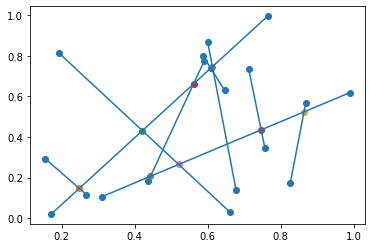

In [13]:
import skgeom as sg
from skgeom.draw import draw
from random import random as r
import itertools
segments = []
for i in range(10):
    segments.append(sg.Segment2(sg.Point2(r(), r()),
                                sg.Point2(r(), r())))

intersections = []
for s1, s2 in itertools.permutations(segments, 2):
    isect = sg.intersection(s1, s2)
    if isect:
        intersections.append(isect)

for s in segments[1:10]:
    draw(s)
for i in intersections[1:10]:
    draw(i)
